In [101]:
import numpy as np
import hdf5storage
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from scipy.interpolate import interp1d

In [104]:
def do_plot(ax,file_name,line_type):
    data = hdf5storage.loadmat(file_name)
    tt = data['ans'][0]
    N_Xe = data['ans'][2]

    
    return ax.plot(tt,N_Xe,line_type)

In [110]:
def do_plot_norm(ax,file_name,line_type):
    data = hdf5storage.loadmat(file_name)
    tt = data['ans'][0]
    N_Xe = data['ans'][2]
    i_fn = interp1d(tt,N_Xe)
    SS_Val = i_fn(4.99E5)
    return ax.plot(tt,N_Xe/SS_Val,line_type)

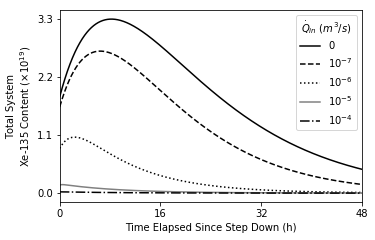

In [112]:
scale = 1.25
fig = plt.figure(figsize=(scale*8.5/2,scale*11/4))

gs = gridspec.GridSpec(1,1)
ax = fig.add_subplot(gs[0,0])

ax_0 = do_plot(ax,'post_sol_out_Q_0.mat','k')
ax_neg_7 = do_plot(ax,'post_sol_out_Q_-7.mat','k--')
ax_neg_6 = do_plot(ax,'post_sol_out_Q_-6.mat','k:')
ax_neg_5 = do_plot(ax,'post_sol_out_Q_-5.mat','0.5')
ax_neg_4 = do_plot(ax,'post_sol_out_Q_-4.mat','k-.')

start_trans = 5E5

ax.set_xlim(start_trans,start_trans+48*60*60)
max_y = max(ax_0[0].get_ydata())

ax.xaxis.set_major_locator(ticker.FixedLocator(np.linspace(start_trans,start_trans+48*60**2,4)))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos : f'{(x-5E5)/(60**2):0.0f}' ))
ax.set_xlabel('Time Elapsed Since Step Down (h)')

ax.yaxis.set_major_locator(ticker.FixedLocator(np.linspace(0,max_y,4)))
exponent = float(('%e' % max_y).split('e')[1])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos : f'{x/(10**exponent):0.1f}' ))
ax.set_ylabel('Total System\nXe-135 Content ($\\times 10 ^{%i}$)' % exponent)


ax.legend(ax_0+ax_neg_7+ax_neg_6+ax_neg_5+ax_neg_4,['0','$10^{-7}$','$10^{-6}$','$10^{-5}$','$10^{-4}$'],title='$\\dot{Q}_{in}\ (m^3 / s)$')


fig.tight_layout()
#fig.savefig('step_down.pdf',bbox_inches='tight')

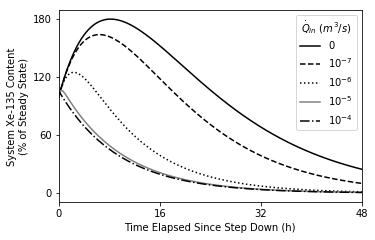

In [123]:
scale = 1.25
fig = plt.figure(figsize=(scale*8.5/2,scale*11/4))

gs = gridspec.GridSpec(1,1)
ax = fig.add_subplot(gs[0,0])

ax_0 = do_plot_norm(ax,'post_sol_out_Q_0.mat','k')
ax_neg_7 = do_plot_norm(ax,'post_sol_out_Q_-7.mat','k--')
ax_neg_6 = do_plot_norm(ax,'post_sol_out_Q_-6.mat','k:')
ax_neg_5 = do_plot_norm(ax,'post_sol_out_Q_-5.mat','0.5')
ax_neg_4 = do_plot_norm(ax,'post_sol_out_Q_-4.mat','k-.')

start_trans = 5E5

ax.set_xlim(start_trans,start_trans+48*60*60)
max_y = max(ax_0[0].get_ydata())

ax.xaxis.set_major_locator(ticker.FixedLocator(np.linspace(start_trans,start_trans+48*60**2,4)))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos : f'{(x-5E5)/(60**2):0.0f}' ))
ax.set_xlabel('Time Elapsed Since Step Down (h)')

ax.yaxis.set_major_locator(ticker.FixedLocator(np.linspace(0,max_y,4)))
exponent = float(('%e' % max_y).split('e')[1])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos : f'{100*x/(10**exponent):0.0f}' ))
ax.set_ylabel('System Xe-135 Content\n(% of Steady State)')


ax.legend(ax_0+ax_neg_7+ax_neg_6+ax_neg_5+ax_neg_4,['0','$10^{-7}$','$10^{-6}$','$10^{-5}$','$10^{-4}$'],title='$\\dot{Q}_{in}\ (m^3 / s)$')


fig.tight_layout()
fig.savefig('step_down_normed.pdf',bbox_inches='tight')

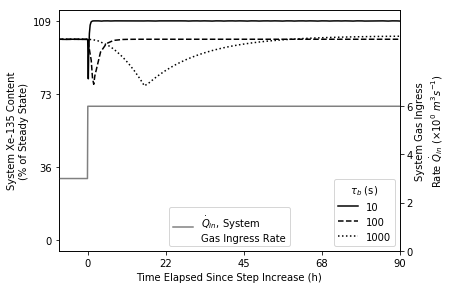

In [220]:
scale = 1.5
fig = plt.figure(figsize=(scale*8.5/2,scale*11/4))

gs = gridspec.GridSpec(1,1)
ax = fig.add_subplot(gs[0,0])

ax_10 = do_plot_norm(ax,'post_sol_out_tau_10.mat','k')
ax_100 = do_plot_norm(ax,'post_sol_out_tau_100.mat','k--')
ax_1000 = do_plot_norm(ax,'post_sol_out_tau_1000.mat','k:')


start_plot = 5E5-500
start_trans = 5E5
end_plot = start_trans+90*60

ax.set_xlim(start_plot,end_plot)
max_y = max(ax_10[0].get_ydata())

ax.xaxis.set_major_locator(ticker.FixedLocator(np.linspace(start_trans,end_plot,5)))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos : f'{(x-start_trans)/(60):0.0f}' ))
ax.set_xlabel('Time Elapsed Since Step Increase (h)')

ax.yaxis.set_major_locator(ticker.FixedLocator(np.linspace(0,max_y,4)))
exponent = float(('%e' % max_y).split('e')[1])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos : f'{100*x/(10**exponent):0.0f}' ))
ax.set_ylabel('System Xe-135 Content\n(% of Steady State)')


#ax.axvline(start_trans,color='0.5',alpha=0.33)


ax_2 = ax.twinx()

tt_2 = np.linspace(start_plot,end_plot,1000)
yy_2 = [3E-3 if x < start_trans else 6E-3 for x in tt_2]

l2 = ax_2.plot(tt_2,yy_2,color='0.5')
ax_2.set_ylim(0,1E-2)
max_y = max(l2[0].get_ydata())
ax_2.yaxis.set_major_locator(ticker.FixedLocator(np.linspace(0,max_y,4)))
exponent_twin = float(('%e' % max_y).split('e')[1])
ax_2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos : f'{x/(10**exponent_twin):0.0f}' ))
ax_2.set_ylabel('System Gas Ingress\nRate $\dot{Q}_{in}\ (\\times 10^{%i}\ m^3 s^{-1})$' % exponent)

ax_2.legend(l2,['$\\dot{Q}_{in}$, System\nGas Ingress Rate'],loc='lower center')

ax.legend(ax_10 + ax_100 + ax_1000,['10', '100', '1000'],title='$\\tau_b$ (s)',loc=4)

fig.tight_layout()
fig.savefig('step_increase_factor_2.pdf',bbox_inches='tight')

In [205]:
max_y

0.006